# Introduction Script

This script will create basemap animations to be used in our introduction to the Earth's Solar Radiation budget. 

In [37]:
#get things
%matplotlib inline 

import numpy as np
import pandas as pd 
from netCDF4 import Dataset 
import numpy.ma as ma 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as patches

filename = "CERES_SYN1_intro.nc"
cwDir = "/Users/kristenbrown/Desktop/SciViz/project/"
ds = Dataset(cwDir+filename, mode="r")
print(ds)

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: CERES SYN1deg Products - Monthly Means
    institution: NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions: CF-1.4
    comment: Data is from East to West and South to North. See values in latitude and longitudes dimensions.
    version: This is version 3A: May 2, 2014
    Fill_Value: Fill Value is -999.0
    dimensions(sizes): lon(360), lat(180), time(187)
    variables(dimensions): float32 lon(lon), float32 lat(lat), int32 time(time), float32 toa_sw_all_mon(time,lat,lon), float32 toa_sw_clr_mon(time,lat,lon), float32 toa_lw_all_mon(time,lat,lon), float32 toa_lw_clr_mon(time,lat,lon), float32 toa_net_all_mon(time,lat,lon), float32 toa_net_clr_mon(time,lat,lon), float32 toa_alb_all_mon(time,lat,lon), float32 toa_alb_clr_mon(time,lat,lon), float32 toa_solar_all_mon(time,lat,lon), float32 aux_skint_mon(time,lat,lon)
    groups: 



In [2]:
#pull out relevant data
time = ds.variables['time'][:]
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
toa = ds.variables['toa_net_all_mon'][:,:,:]
skin = ds.variables['aux_skint_mon'][:,:,:]

solarflux = ds.variables['toa_solar_all_mon'][:,:,:]
longwave = ds.variables['toa_lw_all_mon'][:,:,:]
shortwave = ds.variables['toa_sw_all_mon'][:,:,:]
albedo = ds.variables['toa_alb_all_mon'][:,:,:]


# this part I was just checking the attributes for each variable so I could save it all the same again later. 
print(ds.variables['toa_sw_all_mon']) 
print(solarflux[:,:,0],solarflux[:,:,359])

<type 'netCDF4._netCDF4.Variable'>
float32 toa_sw_all_mon(time, lat, lon)
    long_name: Observed Top of the Atmosphere Shortwave Flux, All-sky conditions, Monthly Means
    standard_name: Observed TOA Shortwave Flux - All-sky
    CF_name: toa_outgoing_shortwave_flux
    IPCC_name: none
    units: W m-2
    valid_min:        0
    valid_max:     1400
    _FillValue: -999.0
unlimited dimensions: 
current shape = (187, 180, 360)
filling off

(array([[  57.02659225,   57.99158478,   59.90829086, ...,   23.70012283,
          21.76133537,   20.78530884],
       [   0.        ,    0.        ,    0.        , ...,  234.95968628,
         235.1028595 ,  235.17451477],
       [   0.        ,    0.        ,    0.        , ...,  432.70181274,
         432.96524048,  433.09738159],
       ..., 
       [   0.        ,    0.        ,    0.        , ...,  473.96664429,
         474.25592041,  474.40020752],
       [   0.        ,    0.        ,    0.        , ...,  311.06307983,
         311.25259399

In [63]:
#rotate globe without data
j=0
for i in xrange(-180,180,1):
    fig=plt.figure(figsize=(16,10))
    m = Basemap(projection='ortho',resolution='l', lon_0=i, lat_0=25.)
    m.bluemarble()
    j+=1
    plt.savefig(cwDir+"intro/globe{0}".format(str(j)),facecolor="black")
    plt.close()
    

In [24]:
#flying sunlight arrows
for i in range(1,100):
    fig=plt.figure(figsize=(10,10))
    bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="yellow", ec="yellow", lw=2)
    t = plt.text(i/100., 1-i/100., "Sunlight",color="yellow", ha="center", va="center", rotation=-45,size=25,bbox=bbox_props)
    bbox_props2 = dict(boxstyle="rarrow,pad=0.3", fc="yellow", ec="yellow", lw=2)
    t2 = plt.text(i/100.+0.1, 1.2-i/100., "Sunlight",color="yellow", ha="center", va="center", rotation=-45,size=25,bbox=bbox_props2)
    bbox_props3 = dict(boxstyle="rarrow,pad=0.3", fc="yellow", ec="yellow", lw=2)
    t3 = plt.text(i/100.-0.1, 0.8-i/100., "Sunlight",color="yellow", ha="center", va="center", rotation=-45,size=25,bbox=bbox_props3)
    plt.xlim([-0.8,1.5])
    plt.ylim([-0.8,1.5])
    plt.axis('off')
    plt.savefig(cwDir+"intro/arrow{0}".format(str(i)))
    plt.close()

In [23]:
# reflected sunlight arrows
for i in range(1,100):
    fig=plt.figure(figsize=(10,10))
    bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="yellow", ec="yellow", lw=0.5)
    t = plt.text(i/100., i/100., "Reflected",color="yellow", ha="center", va="center", rotation=45,size=10,bbox=bbox_props)
    bbox_props2 = dict(boxstyle="rarrow,pad=0.3", fc="yellow", ec="yellow", lw=0.5)
    t2 = plt.text(i/100.-0.08, i/100.+0.12, "Reflected",color="yellow", ha="center", va="center", rotation=45,size=10,bbox=bbox_props2)
    bbox_props3 = dict(boxstyle="rarrow,pad=0.3", fc="yellow", ec="yellow", lw=0.5)
    t3 = plt.text(i/100.+0.12, i/100.-0.08, "Reflected", color="yellow", ha="center", va="center", rotation=45,size=10,bbox=bbox_props3)
    plt.xlim([-0.8,1.5])
    plt.ylim([-0.8,1.5])
    plt.axis('off')
    plt.savefig(cwDir+"intro/arrow_ref{0}".format(str(i)))
    plt.close()

In [ ]:
#rotate globe with solar insolation flux
solarflux2 = np.empty([187, 180, 361])

solarflux2[:,:,range(0,360)] = solarflux
solarflux2[:,:,[360]] = solarflux[:,:,[359]]
lon2 = np.empty(361)
lon2[range(0,360)] = lon - 0.5
lon2[360]=180
print lon2

j=342
for i in xrange(162,180,1):
    fig=plt.figure(figsize=(16,10))
    m = Basemap(projection='ortho',resolution='l', lon_0=i, lat_0=25.)
    m.bluemarble()
    j+=1
    plon, plat = np.meshgrid(lon2, lat)
    x, y = m(plon, plat)
    cm = plt.get_cmap('YlOrBr_r')
    cp = m.contour(x,y,solarflux2[j/2,:,:],700,alpha=0.5,cmap=cm, extend='neither')
    plt.savefig(cwDir+"intro/globe_solar{0}".format(str(j)),facecolor="black")
    plt.close()

In [4]:
# rotate globe with longwave flux
longwave2 = np.empty([187, 180, 361])

longwave2[:,:,range(0,360)] = longwave
longwave2[:,:,[360]] = longwave[:,:,[359]]

j=0
for i in xrange(-180,180,1):
    fig=plt.figure(figsize=(16+j/50.,10+j/50.))
    m = Basemap(projection='ortho',resolution='l', lon_0=i, lat_0=25.)
    m.drawlsmask(land_color='black',ocean_color='black')
    j+=1
    plon, plat = np.meshgrid(lon2, lat)
    x, y = m(plon, plat)
    k = abs(i)
    cm = plt.get_cmap('YlOrBr_r')
    cp = m.contour(x,y,longwave2[j/2,:,:],250,alpha=0.5,cmap=cm, extend='both')
    plt.savefig(cwDir+"intro/globe_lw{0}".format(str(j)),facecolor="black")
    plt.close()

In [ ]:
# zoom in on globe edge to discuss greenhouse effect
j=0
for i in xrange(-180,180,1):
    fig=plt.figure(figsize=(16+j/50.,10+j/50.))
    m = Basemap(projection='ortho',resolution='l', lon_0=i, lat_0=25.)
    m.bluemarble()
    j+=1
    plt.savefig(cwDir+"intro/globe_zoom{0}".format(str(j)),facecolor="black")
    plt.close()


In [30]:
# longwave radiation arrows - no greenhouse

#flying sunlight arrows
for i in range(1,100):
    fig=plt.figure(figsize=(10,10))
    bbox_props = dict(boxstyle="rarrow,pad=0.2", fc="red", ec="red", lw=1)
    t = plt.text(i/100., i/100., "Sunlight",color="red", ha="center", va="center", rotation=45,size=10,bbox=bbox_props)
    bbox_props2 = dict(boxstyle="rarrow,pad=0.2", fc="red", ec="red", lw=1)
    t2 = plt.text(i/100.-0.18, i/100.+0.15, "Sunlight",color="red", ha="center", va="center", rotation=60,size=10,bbox=bbox_props2)
    bbox_props3 = dict(boxstyle="rarrow,pad=0.2", fc="red", ec="red", lw=1)
    t3 = plt.text(i/100.+0.15, i/100.-0.2, "Sunlight",color="red", ha="center", va="center", rotation=30,size=10,bbox=bbox_props3)

    plt.xlim([-0.8,1.5])
    plt.ylim([-0.8,1.5])
    plt.axis('off')
    plt.savefig(cwDir+"intro/arrow_red{0}".format(str(i)))
    plt.close()

In [ ]:
# greenhouse gas thickness barrier

fig = plt.figure(figsize=(32,20),facecolor="black")
ax = fig.add_subplot(111, aspect='equal')
ax.add_patch(patches.Circle((0.5, 0.5), 0.4, fill=False,linewidth=8, edgecolor="white"))
plt.axis('off')
plt.savefig(cwDir+"intro/greenhouse_circ_1",facecolor="black")

fig = plt.figure(figsize=(32,20),facecolor="black")
ax = fig.add_subplot(111, aspect='equal')
ax.add_patch(patches.Circle((0.5, 0.5), 0.4, fill=False,linewidth=15, edgecolor="white"))
plt.axis('off')
plt.savefig(cwDir+"intro/greenhouse_circ_2",facecolor="black")

In [57]:
# rotate globe with temperature
skin2 = np.empty([187, 180, 361])
skin2[:,:,range(0,360)] = skin
skin2[:,:,[360]] = skin[:,:,[359]]

j=0
for i in xrange(-180,180,1):
    fig=plt.figure(figsize=(16,10))
    m = Basemap(projection='ortho',resolution='l', lon_0=i, lat_0=25.)
    m.bluemarble()
    j+=1
    plon, plat = np.meshgrid(lon2, lat)
    x, y = m(plon, plat)
    k = abs(i)
    cm = plt.get_cmap('YlOrBr_r')
    cp = m.contour(x,y,skin2[j/2,:,:],400,alpha=0.3,cmap=cm, extend='both')
    plt.savefig(cwDir+"intro/globe_skin{0}".format(str(j)),facecolor="black")
    plt.close()

In [ ]:
# rotate globe with temperature
skin2 = np.empty([187, 180, 361])
skin2[:,:,range(0,360)] = skin
skin2[:,:,[360]] = skin[:,:,[359]]

j=0
for i in xrange(-180,180,1):
    fig=plt.figure(figsize=(16,10))
    m = Basemap(projection='ortho',resolution='l', lon_0=i, lat_0=25.)
    m.bluemarble()
    j+=1
    plon, plat = np.meshgrid(lon2, lat)
    x, y = m(plon, plat)
    k = abs(i)
    cm = plt.get_cmap('YlOrBr_r')
    cp = m.contour(x,y,skin2[j/2,:,:],150,alpha=0.3,cmap=cm, extend='both')
    plt.savefig(cwDir+"intro/globe_skin_low{0}".format(str(j)),facecolor="black")
    plt.close()

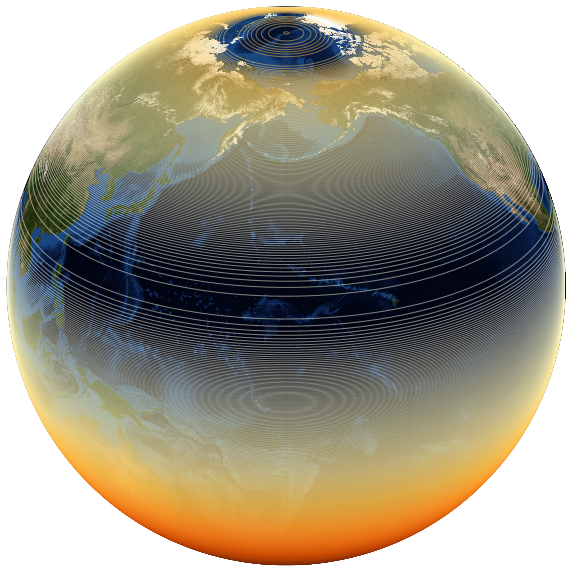

In [104]:
#test cell
fig=plt.figure(figsize=(16,10))
m = Basemap(projection='ortho',resolution='l', lon_0=-180, lat_0=25.) 
m.bluemarble()
plon, plat = np.meshgrid(lon2, lat)
x, y = m(plon, plat)
cm = plt.get_cmap('YlOrBr_r')
cp = m.contour(x,y,solarflux2[5,:,:],700,alpha=0.5,cmap=cm, extend='both')
plt.show()
m.drawlsmask(land_color='black',ocean_color='black')